In [8]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchvision.io import read_image
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
epochs = 2000
image_size = (300, 500)
batch_size = 16
learning_rate = 0.000001
momentum = 0.2

In [2]:
#Data preparation
class CustomImageDataset(Dataset):
    def __init__(self, labels_arr, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.DataFrame(labels_arr)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = torch.tensor(int(self.img_labels.iloc[idx, 1]))
        if self.transform:
            image = self.transform(image.float())
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
    
    
def create_dataset(folder, label):
    files = os.listdir(folder)
    for i in files:
        if i =='.DS_Store':
            files.remove(i)
    files = np.array(files)
    labels_arr = np.zeros(len(files), dtype=np.uint8)
    labels_arr.fill(label)
    labels_arr = np.column_stack((files, labels_arr))

    transform = transforms.Compose([transforms.Resize(image_size)])
    dataset = CustomImageDataset(labels_arr, folder, transform=transform)
    return dataset


#pure train datasets
dataset_on = create_dataset("/Users/gaky/Desktop/efir/all simple on's/on", int(0))
dataset_low = create_dataset("/Users/gaky/Desktop/efir/on hard on's/final low on", int(0))
dataset_off = create_dataset("/Users/gaky/Desktop/efir/off for use/off mix", int(1))
dataset_night = create_dataset("/Users/gaky/Desktop/efir/off for use/off night", int(2))


#agmented train datasets
dataset_off_changed = create_dataset("/Users/gaky/Desktop/efir/off for use/off changed", int(1))
dataset_off_blur = create_dataset("/Users/gaky/Desktop/efir/off for use/off blur", int(1))


#validation datasets
dataset_off_val = create_dataset("/Users/gaky/Desktop/efir/off for use/validation off mix", int(1))
dataset_low_val = create_dataset("/Users/gaky/Desktop/efir/on hard on's/low valid", int(0))
dataset_on_val = create_dataset("/Users/gaky/Desktop/efir/all simple on's/validation on", int(0))

train_dataset = ConcatDataset([dataset_on, dataset_low, dataset_off, dataset_night, dataset_off_blur])
print(len(train_dataset))

dataloader_train = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

dataloader_val_off = DataLoader(dataset_off_val, batch_size=len(dataset_off_val), shuffle=False)
dataloader_low_val = DataLoader(dataset_low_val, batch_size=len(dataset_low_val), shuffle=False)
dataloader_on_val = DataLoader(dataset_on_val, batch_size=len(dataset_on_val), shuffle=False)

dataloader_off = DataLoader(dataset_off, batch_size=len(dataset_off), shuffle=False)
dataloader_low = DataLoader(dataset_low, batch_size=len(dataset_low), shuffle=False)
dataloader_on = DataLoader(dataset_on, batch_size=len(dataset_on), shuffle=False)
dataloader_night = DataLoader(dataset_night, batch_size=len(dataset_night), shuffle=False)

656


In [3]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.m = nn.Dropout(p=0.5)
        
        self.conv1 = nn.Conv2d(3, 32, 3, stride=1, padding=1)#180x180
        nn.init.kaiming_normal_(self.conv1.weight, mode='fan_in', nonlinearity='relu')
        self.conv1_bn = nn.BatchNorm2d(32)
        
        self.conv12 = nn.Conv2d(32, 32, 3, stride=1, padding=1)#180x180
        nn.init.kaiming_normal_(self.conv12.weight, mode='fan_in', nonlinearity='relu')
        self.conv12_bn = nn.BatchNorm2d(32)
        
        self.pool1 = nn.MaxPool2d(2, stride=2)#90x90
        self.pool1_bn = nn.BatchNorm2d(32)
        
        self.conv2 = nn.Conv2d(32, 64, 3, stride=1, padding=1)#90x90
        nn.init.kaiming_normal_(self.conv2.weight, mode='fan_in', nonlinearity='relu')
        self.conv2_bn = nn.BatchNorm2d(64)
        
                
        self.conv22 = nn.Conv2d(64, 64, 3, stride=1, padding=1)#90x90
        nn.init.kaiming_normal_(self.conv22.weight, mode='fan_in', nonlinearity='relu')
        self.conv22_bn = nn.BatchNorm2d(64)
        
        self.conv23 = nn.Conv2d(64, 64, 3, stride=1, padding=1)#90x90
        nn.init.kaiming_normal_(self.conv23.weight, mode='fan_in', nonlinearity='relu')
        self.conv23_bn = nn.BatchNorm2d(64)
        
        self.conv24 = nn.Conv2d(64, 64, 3, stride=1, padding=1)#90x90
        nn.init.kaiming_normal_(self.conv24.weight, mode='fan_in', nonlinearity='relu')
        self.conv24_bn = nn.BatchNorm2d(64)
        
        self.pool2 = nn.MaxPool2d(2, stride=2)#45x45
        self.pool2_bn = nn.BatchNorm2d(64)
        
        self.conv3 = nn.Conv2d(64, 128, 3, stride=1, padding=1)#45x45
        nn.init.kaiming_normal_(self.conv3.weight, mode='fan_in', nonlinearity='relu')
        self.conv3_bn = nn.BatchNorm2d(128)
        
        self.conv32 = nn.Conv2d(128, 128, 3, stride=1, padding=1)#45x45
        nn.init.kaiming_normal_(self.conv32.weight, mode='fan_in', nonlinearity='relu')
        self.conv32_bn = nn.BatchNorm2d(128)
        
        self.conv33 = nn.Conv2d(128, 128, 3, stride=1, padding=1)#45x45
        nn.init.kaiming_normal_(self.conv33.weight, mode='fan_in', nonlinearity='relu')
        self.conv33_bn = nn.BatchNorm2d(128)
        
        self.conv34 = nn.Conv2d(128, 128, 3, stride=1, padding=1)#45x45
        nn.init.kaiming_normal_(self.conv34.weight, mode='fan_in', nonlinearity='relu')
        self.conv34_bn = nn.BatchNorm2d(128)
        
        self.pool3 = nn.MaxPool2d(2, stride=2)#27x27
        self.pool3_bn = nn.BatchNorm2d(128)
        
        self.conv4 = nn.Conv2d(128, 256, 3, stride=1, padding=1)#27x27
        nn.init.kaiming_normal_(self.conv4.weight, mode='fan_in', nonlinearity='relu')
        self.conv4_bn = nn.BatchNorm2d(256)
        
        self.conv42 = nn.Conv2d(256, 256, 3, stride=1, padding=1)#27x27
        nn.init.kaiming_normal_(self.conv42.weight, mode='fan_in', nonlinearity='relu')
        self.conv42_bn = nn.BatchNorm2d(256)
        
        self.conv43 = nn.Conv2d(256, 256, 3, stride=1, padding=1)#27x27
        nn.init.kaiming_normal_(self.conv43.weight, mode='fan_in', nonlinearity='relu')
        self.conv43_bn = nn.BatchNorm2d(256)
        
        self.conv44 = nn.Conv2d(256, 256, 3, stride=1, padding=1)#27x27
        nn.init.kaiming_normal_(self.conv44.weight, mode='fan_in', nonlinearity='relu')
        self.conv44_bn = nn.BatchNorm2d(256)
        
        self.pool4 = nn.MaxPool2d(2, stride=2)#13x13
        self.pool4_bn = nn.BatchNorm2d(256)
        
        self.conv5 = nn.Conv2d(256, 256, 3, stride=1, padding=1)#13x13
        nn.init.kaiming_normal_(self.conv5.weight, mode='fan_in', nonlinearity='relu')
        self.conv5_bn = nn.BatchNorm2d(256)
        
        self.conv52 = nn.Conv2d(256, 256, 3, stride=1, padding=1)#13x13
        nn.init.kaiming_normal_(self.conv52.weight, mode='fan_in', nonlinearity='relu')
        self.conv52_bn = nn.BatchNorm2d(256)
        
        self.conv53 = nn.Conv2d(256, 256, 3, stride=1, padding=1)#13x13
        nn.init.kaiming_normal_(self.conv53.weight, mode='fan_in', nonlinearity='relu')
        self.conv53_bn = nn.BatchNorm2d(256)
        
        self.conv54 = nn.Conv2d(256, 256, 3, stride=1, padding=1)#13x13
        nn.init.kaiming_normal_(self.conv54.weight, mode='fan_in', nonlinearity='relu')
        self.conv54_bn = nn.BatchNorm2d(256)
        
        self.pool5 = nn.AvgPool2d(2, stride=2)#6x6
        self.pool5_bn = nn.BatchNorm2d(256)


        self.fc1 = nn.Linear(9*15*256, 4096)
        nn.init.kaiming_normal_(self.fc1.weight, mode='fan_in', nonlinearity='relu')
        self.fc1_bn = nn.BatchNorm1d(4096)
        
        self.fc2 = nn.Linear(4096, 4096)
        nn.init.kaiming_normal_(self.fc2.weight, mode='fan_in', nonlinearity='relu')
        self.fc2_bn = nn.BatchNorm1d(4096)
        
        self.fc3 = nn.Linear(4096, 3)
        nn.init.kaiming_normal_(self.fc3.weight, mode='fan_in', nonlinearity='relu')
        

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv1_bn(x)
        x = F.relu(x)
        
        x = self.conv12(x)
        x = self.conv12_bn(x)
        x = F.relu(x)
        
        x = self.pool1(x)
        x = self.pool1_bn(x)
        
        x = self.conv2(x)
        x = self.conv2_bn(x)
        x = F.relu(x)
        
        x = self.conv22(x)
        x = self.conv22_bn(x)
        x = F.relu(x)
        
        x = self.conv23(x)
        x = self.conv23_bn(x)
        x = F.relu(x)
        
        x = self.conv24(x)
        x = self.conv24_bn(x)
        x = F.relu(x)
        
        x = self.pool2(x)
        x = self.pool2_bn(x)
        
        x = self.conv3(x)
        x = self.conv3_bn(x)
        x = F.relu(x)
        
        x = self.conv32(x)
        x = self.conv32_bn(x)
        x = F.relu(x)
        
        x = self.conv33(x)
        x = self.conv33_bn(x)
        x = F.relu(x)
        
        x = self.conv34(x)
        x = self.conv34_bn(x)
        x = F.relu(x)
        
        x = self.pool3(x)
        x = self.pool3_bn(x)
        
        x = self.conv4(x)
        x = self.conv4_bn(x)
        x = F.relu(x)
        
        x = self.conv42(x)
        x = self.conv42_bn(x)
        x = F.relu(x)
        
        x = self.conv43(x)
        x = self.conv43_bn(x)
        x = F.relu(x)
        
        x = self.conv44(x)
        x = self.conv44_bn(x)
        x = F.relu(x)
        
        x = self.pool4(x)
        x = self.pool4_bn(x)
        
        x = self.conv5(x)
        x = self.conv5_bn(x)
        x = F.relu(x)
        
        x = self.conv52(x)
        x = self.conv52_bn(x)
        x = F.relu(x)
        
        x = self.conv53(x)
        x = self.conv53_bn(x)
        x = F.relu(x)
        
        x = self.conv54(x)
        x = self.conv54_bn(x)
        x = F.relu(x)
        
        x = self.pool5(x)
        x = self.pool5_bn(x)
        
        #print(x.shape)
        
        x = x.view(-1, 9*15*256)   
        
        
        x = self.fc1(x)
        x = self.fc1_bn(x)
        x = F.relu(x)
        
        x = self.m(x)
        
        x = self.fc2(x)
        x = self.fc2_bn(x)
        x = F.relu(x)
        
        x = self.m(x)
        
        x = self.fc3(x)
        #x = F.relu(x)
        #x = F.dropout(x)
        
        #x = self.fc4(x)
        return x


model = ConvNet().to(device)



loss_function = nn.CrossEntropyLoss()
#optim = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
optim = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1)

In [4]:
def evaluate(dataloader, name):
    with torch.no_grad():
        dataset = iter(dataloader)
        x, y = next(dataset)
        
        x = x/255.
        x = x.to(device)
        y = y.to(device)
        model.eval()
        out = model(x.float())
        cat = torch.argmax(out, dim=1)
        
        if name == "off_val":
            for i in range(len(cat)):
                if cat[i] == 2:
                    cat[i] = 1

        accuracy = (cat == y).float().mean()
        print(accuracy, name)

In [5]:
def save_model(epoch):
    model_scripted = torch.jit.script(model) # Export to TorchScript
    model_scripted.save("/Users/gaky/Desktop/efir/Models/"+ str(epoch) + ".pth") # Save

In [9]:
losses = []
import time

for epoch in range(epochs):
    start = time.time()
    for i, (x, y) in enumerate(dataloader_train):
        x = x/255.
        x = x.to(device)
        y = y.to(device)
        model.train()
        
        model.zero_grad()
        start = time.time()
        
        out = model(x.float())
        
        loss = loss_function(out, y.long())
        loss_mean = loss.mean()
        loss_mean.backward()
        optim.step()

        print(epoch, i, loss_mean)
        
        losses.append(loss.detach().item())
        
        if epoch % 1 == 0 and epoch != 0 and i == 0:
            evaluate(dataloader_val_off, "off_val")
            evaluate(dataloader_low_val, "low_val")
            evaluate(dataloader_on_val, "on_val")
            
            save_model(epoch)
            #evaluate(dataloader_off, "off")
            #evaluate(dataloader_low, "low")
            #evaluate(dataloader_on, "on")
            #evaluate(dataloader_night, "night")
            
    stop = time.time()
    print(stop - start)
    print(np.mean(losses))

0 0 tensor(0.2724, grad_fn=<MeanBackward0>)
0 1 tensor(0.7776, grad_fn=<MeanBackward0>)
0 2 tensor(0.2309, grad_fn=<MeanBackward0>)
0 3 tensor(0.2356, grad_fn=<MeanBackward0>)
0 4 tensor(0.1536, grad_fn=<MeanBackward0>)
0 5 tensor(0.2496, grad_fn=<MeanBackward0>)
0 6 tensor(0.3640, grad_fn=<MeanBackward0>)
0 7 tensor(0.5806, grad_fn=<MeanBackward0>)
0 8 tensor(0.2338, grad_fn=<MeanBackward0>)
0 9 tensor(0.2574, grad_fn=<MeanBackward0>)
0 10 tensor(0.3113, grad_fn=<MeanBackward0>)
0 11 tensor(0.4522, grad_fn=<MeanBackward0>)
0 12 tensor(0.3883, grad_fn=<MeanBackward0>)
0 13 tensor(0.2854, grad_fn=<MeanBackward0>)
0 14 tensor(0.4807, grad_fn=<MeanBackward0>)
0 15 tensor(0.3254, grad_fn=<MeanBackward0>)
0 16 tensor(0.3332, grad_fn=<MeanBackward0>)
0 17 tensor(0.5818, grad_fn=<MeanBackward0>)
0 18 tensor(0.2256, grad_fn=<MeanBackward0>)
0 19 tensor(0.2401, grad_fn=<MeanBackward0>)
0 20 tensor(0.3175, grad_fn=<MeanBackward0>)
0 21 tensor(0.3443, grad_fn=<MeanBackward0>)
0 22 tensor(0.3935, 

4 11 tensor(0.0979, grad_fn=<MeanBackward0>)
4 12 tensor(0.3745, grad_fn=<MeanBackward0>)
4 13 tensor(0.1691, grad_fn=<MeanBackward0>)
4 14 tensor(0.4572, grad_fn=<MeanBackward0>)
4 15 tensor(0.4800, grad_fn=<MeanBackward0>)
4 16 tensor(0.8031, grad_fn=<MeanBackward0>)
4 17 tensor(0.2143, grad_fn=<MeanBackward0>)
4 18 tensor(0.2953, grad_fn=<MeanBackward0>)
4 19 tensor(0.5609, grad_fn=<MeanBackward0>)
4 20 tensor(0.5003, grad_fn=<MeanBackward0>)
4 21 tensor(0.1433, grad_fn=<MeanBackward0>)
4 22 tensor(0.3627, grad_fn=<MeanBackward0>)
4 23 tensor(0.8318, grad_fn=<MeanBackward0>)
4 24 tensor(0.7716, grad_fn=<MeanBackward0>)
4 25 tensor(0.3340, grad_fn=<MeanBackward0>)
4 26 tensor(0.3820, grad_fn=<MeanBackward0>)
4 27 tensor(0.2995, grad_fn=<MeanBackward0>)
4 28 tensor(0.2611, grad_fn=<MeanBackward0>)
4 29 tensor(0.7000, grad_fn=<MeanBackward0>)
4 30 tensor(0.2230, grad_fn=<MeanBackward0>)
4 31 tensor(0.1605, grad_fn=<MeanBackward0>)
4 32 tensor(0.3216, grad_fn=<MeanBackward0>)
4 33 tenso

KeyboardInterrupt: 

Populating the interactive namespace from numpy and matplotlib


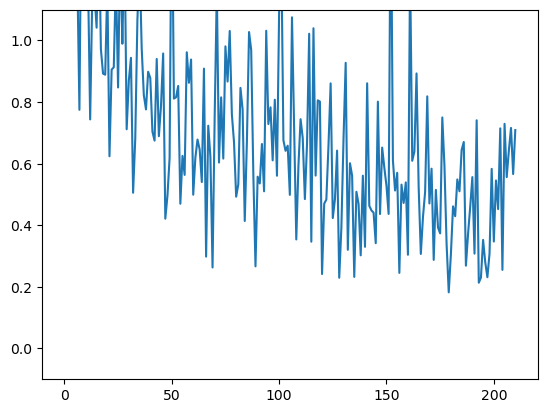

In [23]:
%pylab inline
import numpy as np
plt.ylim(-0.1, 1.1)
plot(cock)

In [27]:
model_scripted = torch.jit.script(model) # Export to TorchScript
model_scripted.save("/Users/gaky/Desktop/efir/Models/"+ str(4)+ ".pth") # Save

In [7]:
model = torch.jit.load('/Users/gaky/Desktop/efir/Models/4.pth')
model.eval()

RecursiveScriptModule(
  original_name=ConvNet
  (m): RecursiveScriptModule(original_name=Dropout)
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (conv1_bn): RecursiveScriptModule(original_name=BatchNorm2d)
  (conv12): RecursiveScriptModule(original_name=Conv2d)
  (conv12_bn): RecursiveScriptModule(original_name=BatchNorm2d)
  (pool1): RecursiveScriptModule(original_name=MaxPool2d)
  (pool1_bn): RecursiveScriptModule(original_name=BatchNorm2d)
  (conv2): RecursiveScriptModule(original_name=Conv2d)
  (conv2_bn): RecursiveScriptModule(original_name=BatchNorm2d)
  (pool2): RecursiveScriptModule(original_name=MaxPool2d)
  (pool2_bn): RecursiveScriptModule(original_name=BatchNorm2d)
  (conv3): RecursiveScriptModule(original_name=Conv2d)
  (conv3_bn): RecursiveScriptModule(original_name=BatchNorm2d)
  (pool3): RecursiveScriptModule(original_name=MaxPool2d)
  (pool3_bn): RecursiveScriptModule(original_name=BatchNorm2d)
  (conv4): RecursiveScriptModule(original_name=Conv2d)
  (conv4_

In [25]:
folder = "/Users/gaky/Desktop/efir/on hard on's/low valid"

In [27]:
import os
from PIL import Image

images = os.listdir(folder)
shit_images = []


for i in images:
    if i == ".DS_Store":
        images.remove(i)

with torch.no_grad():
    model.eval()
    for i in images:
        im1 = folder+"/"+i
        im = read_image(folder+"/"+i)
        transform = transforms.Compose([transforms.Resize((300, 500))])
        tensor = transform(im)
        tensor = tensor
        x = tensor/255.
        model.eval()

        out = model(x.float().unsqueeze(0))
        cat = torch.argmax(out, dim=1)
        if cat.item() == 1 or  cat.item() == 2:
            print("dick")
            shit_images.append(im1)


dick
dick
dick
dick
dick
dick
dick
dick


In [28]:
len(shit_images)

8

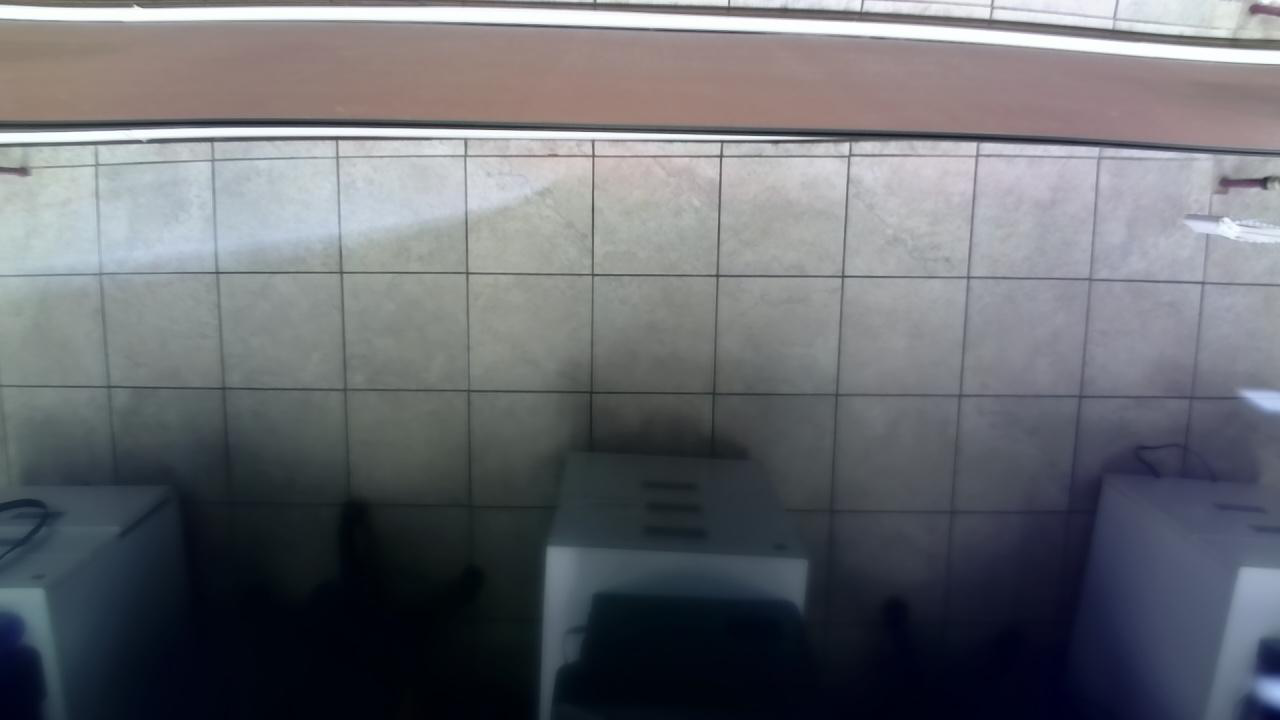

In [35]:
img = Image.open(shit_images[7])
img

In [15]:
len(shit_images)

70

In [16]:
evaluate(dataloader_val_off, "off_val")

tensor(0.9701) off_val


In [17]:
def evaluate2(dataloader, name):
    with torch.no_grad():
        dataset = iter(dataloader)
        x, y = next(dataset)
        
        x = x/255.
        x = x.to(device)
        y = y.to(device)
        model.eval()
        
        out = model(x.float())
        cat = torch.argmax(out, dim=1)
        accuracy = (cat == y).float().mean()
        print(cat)
        print(accuracy, name)

In [18]:
evaluate2(dataloader_low_val, "low_val")

tensor([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
tensor(0.7571) low_val
